In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization
import math  # For mathematical operations

from scipy.stats import zscore, skew  # For z-score calculation and skewness

# Modules for data preprocessing and model building from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.feature_selection import f_regression  # For feature selection using F-regression

import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set an option to display all columns in the DataFrame without truncation
pd.set_option('display.max_columns', None)

In [2]:
application_test = pd.read_csv('application_test.csv')
application_train = pd.read_csv('application_train.csv')

In [3]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Initialize a list to keep track of columns with missing values
missing_list = []
# Initialize a list to keep track of columns to be dropped due to high missing value percentage
droped_columns = []

# Loop through each column in 'application_train' and their corresponding number of missing values
for i, j in application_train.isnull().sum().items():
    
    # Check if the percentage of missing values in the column is greater than 0%
    if j / application_train.shape[0] * 100 > 0:
        
        # Add the column name to the missing_list
        missing_list.append(i)
        # Print the column name and its percentage of missing values, rounded to 2 decimal places
        print(f"{i} - {round(j / application_train.shape[0] * 100, 2)}%")
    
    # Check if the percentage of missing values in the column is greater than 10%
    if j / application_train.shape[0] * 100 > 10:
        # Add the column name to the droped_columns list
        droped_columns.append(i)
        # Remove the column name from the missing_list as it will be dropped
        missing_list.remove(i)
        # Drop the column from 'application_train' dataframe in place
        application_train.drop(columns=[i], inplace=True)

# Print the names of columns that have been dropped
print(f"Droped columns: {droped_columns}")

# Drop the 'SK_ID_CURR' column from 'application_train' dataframe in place
application_train.drop(columns=['SK_ID_CURR'], inplace=True)


AMT_ANNUITY - 0.0%
AMT_GOODS_PRICE - 0.09%
NAME_TYPE_SUITE - 0.42%
OWN_CAR_AGE - 65.99%
OCCUPATION_TYPE - 31.35%
CNT_FAM_MEMBERS - 0.0%
EXT_SOURCE_1 - 56.38%
EXT_SOURCE_2 - 0.21%
EXT_SOURCE_3 - 19.83%
APARTMENTS_AVG - 50.75%
BASEMENTAREA_AVG - 58.52%
YEARS_BEGINEXPLUATATION_AVG - 48.78%
YEARS_BUILD_AVG - 66.5%
COMMONAREA_AVG - 69.87%
ELEVATORS_AVG - 53.3%
ENTRANCES_AVG - 50.35%
FLOORSMAX_AVG - 49.76%
FLOORSMIN_AVG - 67.85%
LANDAREA_AVG - 59.38%
LIVINGAPARTMENTS_AVG - 68.35%
LIVINGAREA_AVG - 50.19%
NONLIVINGAPARTMENTS_AVG - 69.43%
NONLIVINGAREA_AVG - 55.18%
APARTMENTS_MODE - 50.75%
BASEMENTAREA_MODE - 58.52%
YEARS_BEGINEXPLUATATION_MODE - 48.78%
YEARS_BUILD_MODE - 66.5%
COMMONAREA_MODE - 69.87%
ELEVATORS_MODE - 53.3%
ENTRANCES_MODE - 50.35%
FLOORSMAX_MODE - 49.76%
FLOORSMIN_MODE - 67.85%
LANDAREA_MODE - 59.38%
LIVINGAPARTMENTS_MODE - 68.35%
LIVINGAREA_MODE - 50.19%
NONLIVINGAPARTMENTS_MODE - 69.43%
NONLIVINGAREA_MODE - 55.18%
APARTMENTS_MEDI - 50.75%
BASEMENTAREA_MEDI - 58.52%
YEARS_BEG

In [5]:
# Loop through each column in 'application_train' and their corresponding number of missing values
for i, j in application_train.isnull().sum().items():
    
    # Calculate the percentage of missing values in the column
    missing_percentage = j / application_train.shape[0] * 100
    
    # Check if the percentage of missing values in the column is greater than 0%
    if missing_percentage > 0:
        # Print the column name and its percentage of missing values, rounded to 2 decimal places
        print(f"{i} - {round(missing_percentage, 2)}%")


AMT_ANNUITY - 0.0%
AMT_GOODS_PRICE - 0.09%
NAME_TYPE_SUITE - 0.42%
CNT_FAM_MEMBERS - 0.0%
EXT_SOURCE_2 - 0.21%
OBS_30_CNT_SOCIAL_CIRCLE - 0.33%
DEF_30_CNT_SOCIAL_CIRCLE - 0.33%
OBS_60_CNT_SOCIAL_CIRCLE - 0.33%
DEF_60_CNT_SOCIAL_CIRCLE - 0.33%
DAYS_LAST_PHONE_CHANGE - 0.0%


In [6]:
# Select columns from 'application_train' that are not numerical (i.e., categorical) 
# and convert the column names into a list. This is achieved by excluding columns of type 'number'.
categorical_columns = application_train.select_dtypes(exclude='number').columns.tolist()

# Select columns from 'application_train' that are numerical and convert the column names into a list.
# This is done by specifically selecting columns of type 'number'.
numerical_columns = application_train.select_dtypes('number').columns.tolist()


In [7]:
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [8]:
missing_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [9]:
def fill_missing_with_mean(df, columns):
    # Loop through each column in the provided 'columns' list
    for column in columns:
        # Replace missing values in the column with the mean of the column
        # 'fillna' is used to fill NA/NaN values using the specified method, which is the mean in this case
        df[column] = df[column].fillna(df[column].mean())

    # Return the DataFrame after filling missing values
    return df


In [10]:
# Fill missing values in the 'NAME_TYPE_SUITE' column with the most frequent value (mode) in that column.
# 'fillna' is used here with the mode (most common value) of 'NAME_TYPE_SUITE'.
# Since 'mode()' can return multiple values if there is a tie, '[0]' is used to select the first mode.
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].fillna(application_train['NAME_TYPE_SUITE'].mode()[0])

# Remove 'NAME_TYPE_SUITE' from the missing_list as its missing values have been addressed.
missing_list.remove('NAME_TYPE_SUITE')

# Use the 'fill_missing_with_mean' function (defined earlier) to fill missing values in the remaining columns
# in 'missing_list' with their respective mean values.
# The DataFrame 'application_train' is updated with the filled values.
application_train = fill_missing_with_mean(application_train, missing_list)


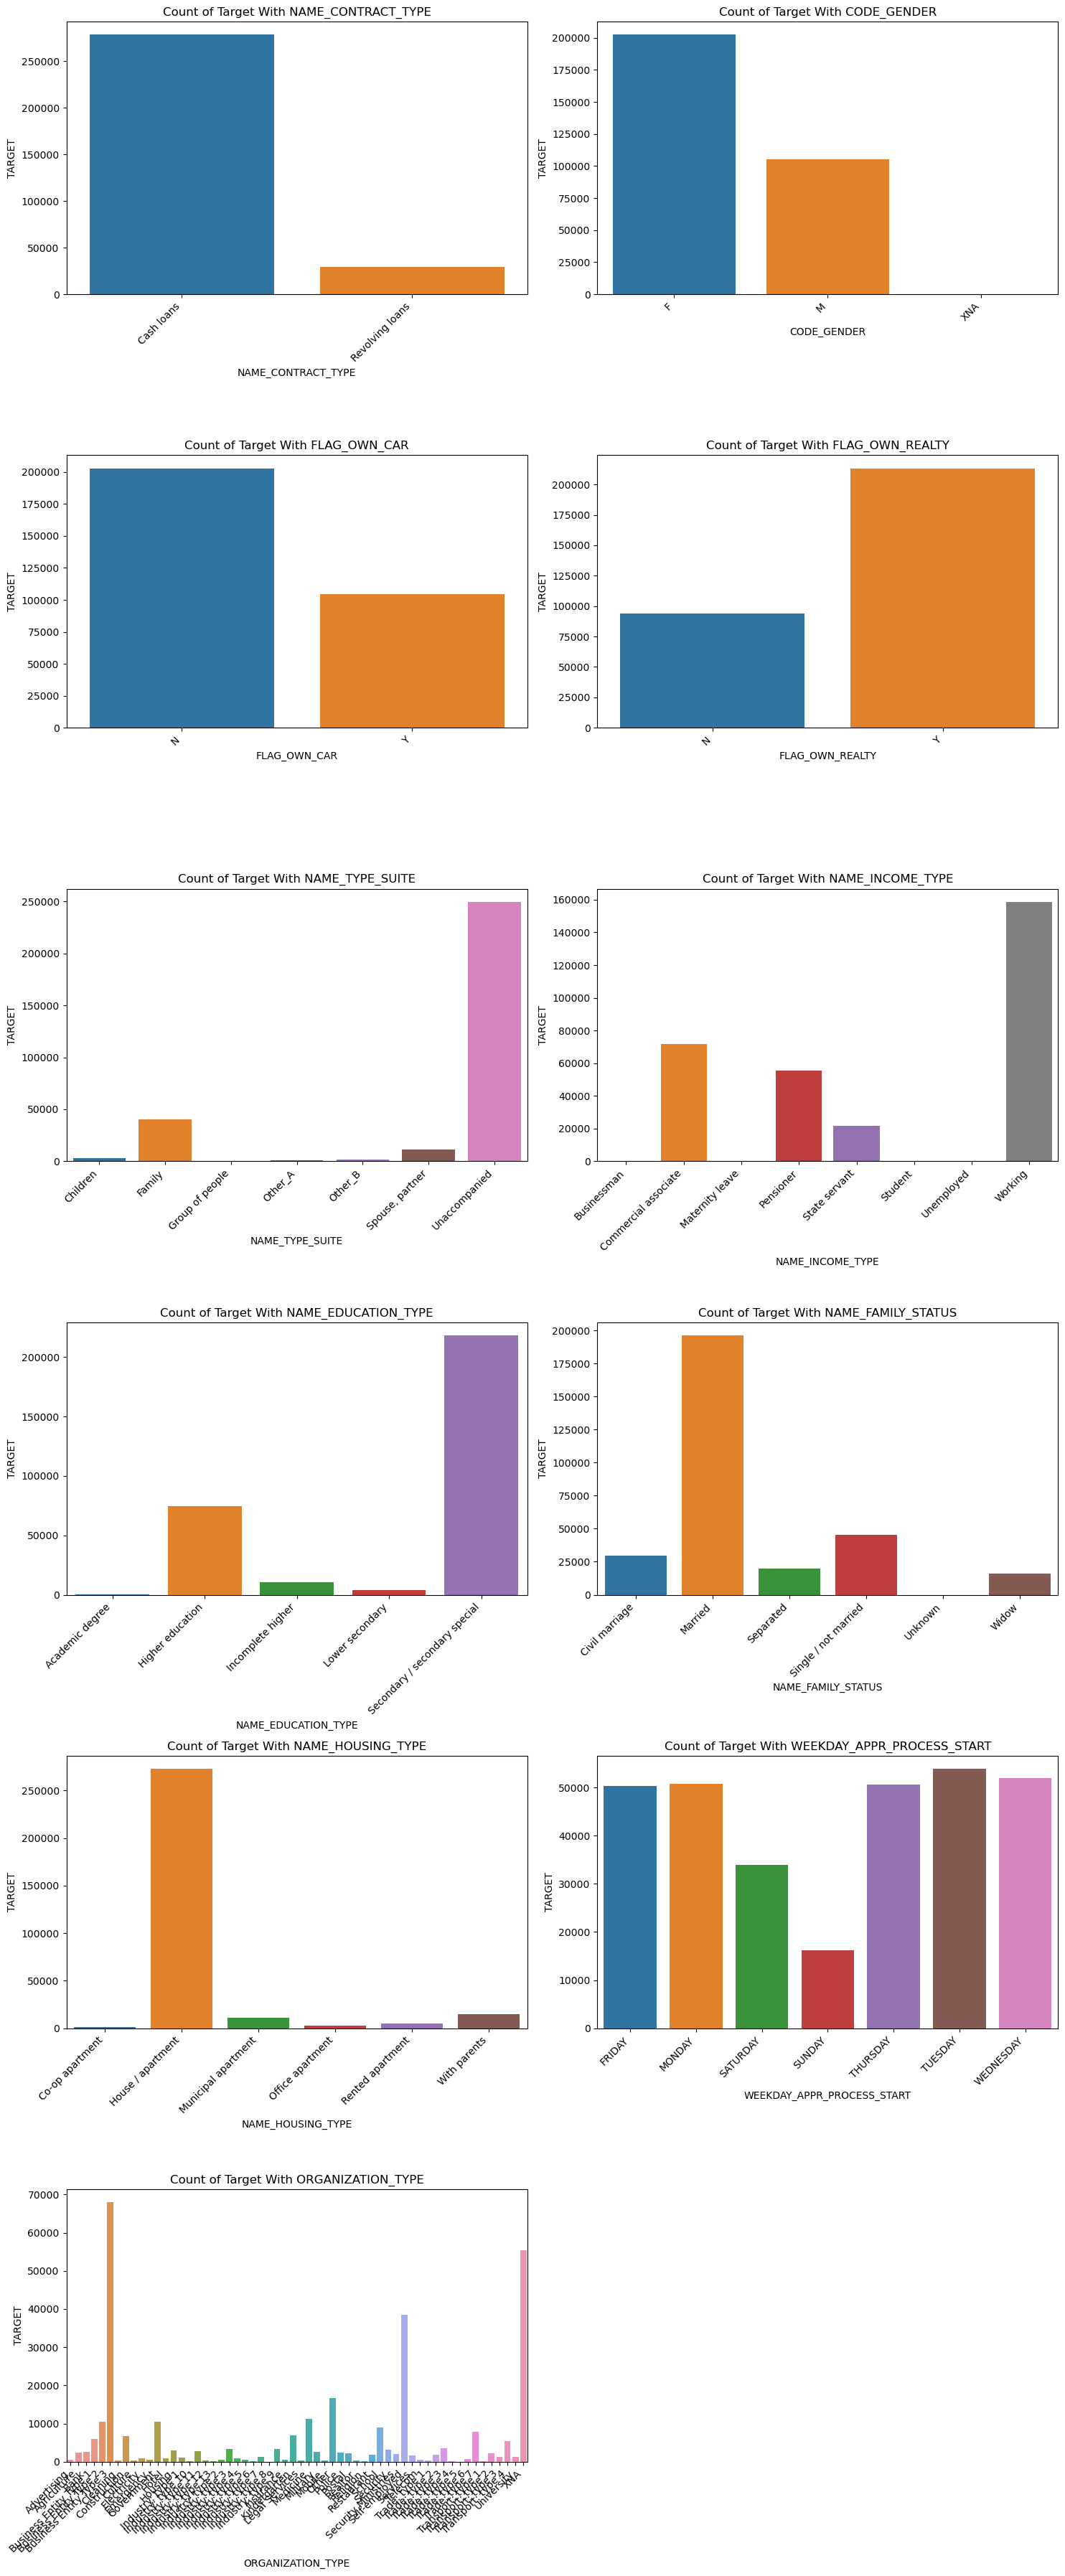

In [11]:
# Function to plot each categorical column against the 'TARGET' variable
def plot_categorical_column_with_price(x, ax):
    # Group by the categorical column and count the number of occurrences for each category
    count = application_train.groupby(x)['TARGET'].count()
    # Create a bar plot with the counts
    sns.barplot(x=count.index, y=count.values, ax=ax)
    # Set the x and y labels
    ax.set_xlabel(x)
    ax.set_ylabel('TARGET')
    # Rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # Set the title of the subplot
    ax.set_title(f'Count of Target With {x}')

# Setting up the number of columns and rows for subplots
num_columns = 2
num_rows = -(-len(categorical_columns) // num_columns)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 6))

# Loop through each categorical column and create a plot
for i, column in enumerate(categorical_columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col] if num_rows > 1 else axes[col]
    plot_categorical_column_with_price(column, ax)

# Remove any extra subplots that are not needed
for i in range(len(categorical_columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


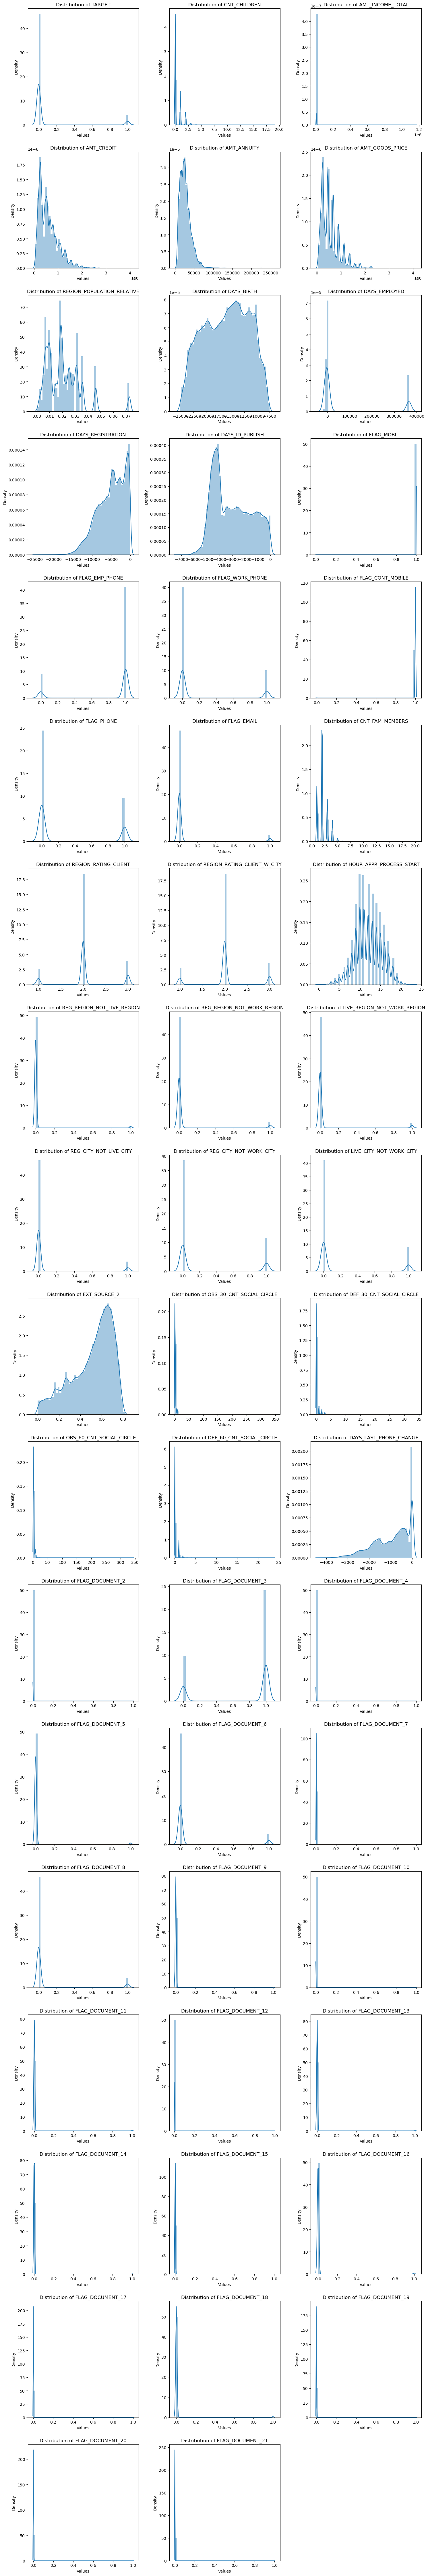

In [12]:
# Define the number of columns and calculate the number of rows needed for subplots
num_columns = 3
num_rows = math.ceil(len(numerical_columns) / num_columns)

# Create a figure and a grid of subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Iterate through each numerical column to create a distribution plot
for i, column in enumerate(numerical_columns):
    # Calculate the position of the current subplot
    row = i // num_columns
    col = i % num_columns
    # Select the appropriate Axes object based on the row and column
    ax = axes[row, col] if num_rows > 1 else axes[col]
    # Create a distribution plot for the current column
    sns.distplot(application_train[column], ax=ax)
    # Set the title, x-label, and y-label for the plot
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

# Remove any extra subplots that are not needed
for i in range(len(numerical_columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import skew

# Initialize a dictionary to store skewness values for each numerical column
skewness_values = {}

# Iterate through each numerical column
for i in numerical_columns:
    # Calculate the skewness of the column and round it to 1 decimal place
    # 'skew' function from scipy.stats is used to compute the skewness
    skewness_values[i] = round(skew(application_train[i]), 1)

# Iterate over the skewness_values dictionary to print the skewness for each column
for i, j in skewness_values.items():
    # Print the column name and its corresponding skewness value
    print(f"Skewness of '{i}': {j}")


Skewness of 'TARGET': 3.1
Skewness of 'CNT_CHILDREN': 2.0
Skewness of 'AMT_INCOME_TOTAL': 391.6
Skewness of 'AMT_CREDIT': 1.2
Skewness of 'AMT_ANNUITY': 1.6
Skewness of 'AMT_GOODS_PRICE': 1.3
Skewness of 'REGION_POPULATION_RELATIVE': 1.5
Skewness of 'DAYS_BIRTH': -0.1
Skewness of 'DAYS_EMPLOYED': 1.7
Skewness of 'DAYS_REGISTRATION': -0.6
Skewness of 'DAYS_ID_PUBLISH': 0.3
Skewness of 'FLAG_MOBIL': -554.5
Skewness of 'FLAG_EMP_PHONE': -1.7
Skewness of 'FLAG_WORK_PHONE': 1.5
Skewness of 'FLAG_CONT_MOBILE': -23.1
Skewness of 'FLAG_PHONE': 1.0
Skewness of 'FLAG_EMAIL': 3.8
Skewness of 'CNT_FAM_MEMBERS': 1.0
Skewness of 'REGION_RATING_CLIENT': 0.1
Skewness of 'REGION_RATING_CLIENT_W_CITY': 0.1
Skewness of 'HOUR_APPR_PROCESS_START': -0.0
Skewness of 'REG_REGION_NOT_LIVE_REGION': 7.9
Skewness of 'REG_REGION_NOT_WORK_REGION': 4.1
Skewness of 'LIVE_REGION_NOT_WORK_REGION': 4.7
Skewness of 'REG_CITY_NOT_LIVE_CITY': 3.1
Skewness of 'REG_CITY_NOT_WORK_CITY': 1.3
Skewness of 'LIVE_CITY_NOT_WORK_CIT

In [14]:
# Convert categorical variable(s) into dummy/indicator variables.
# For each categorical column in 'application_train', dummy variables are created.
# The 'dtype=float' argument specifies that the new dummy columns should have data type 'float'.
# 'drop_first=True' means the first category of each categorical variable will be dropped to avoid the dummy variable trap.
application_train = pd.get_dummies(application_train, dtype=float, drop_first=True)


In [15]:
# Extract the target variable 'TARGET' from the DataFrame and store it in variable 'y'.
# This will be used as the dependent variable for model training.
y = application_train['TARGET']

# Drop the 'TARGET' column from 'application_train' to isolate the feature variables.
# 'inplace=True' modifies the DataFrame in place without returning a new DataFrame.
application_train.drop(columns='TARGET', inplace=True)

# Assign the modified DataFrame (now containing only feature variables) to variable 'X'.
# This will be used as the independent variables for model training.
X = application_train


In [16]:
from sklearn.feature_selection import f_regression
import pandas as pd

# Compute the p-values for each feature in X with respect to the target y using f_regression
p_values = f_regression(X, y)[1]
# Get the list of feature names
feature_names = X.columns.tolist()

# Create a DataFrame to summarize the features and their corresponding p-values
reg_summary = pd.DataFrame({'Features': feature_names, 'p-values': p_values})

# Continue the process as long as there is a feature with a p-value greater than 0.05
while reg_summary['p-values'].max() > 0.05:
    # Find the index of the feature with the maximum p-value
    max_p_index = reg_summary['p-values'].idxmax()
    # Identify the feature name to drop
    feature_to_drop = reg_summary.loc[max_p_index, 'Features']

    # Drop the feature with the highest p-value from X
    X = X.drop(columns=[feature_to_drop])

    # Recompute the p-values for the updated set of features
    p_values = f_regression(X, y)[1]
    feature_names = X.columns.tolist()

    # Update the regression summary DataFrame
    reg_summary = pd.DataFrame({'Features': feature_names, 'p-values': p_values})

# Display the final summary of features and their p-values
reg_summary


,Features,p-values
0,CNT_CHILDREN,1.922492e-26
1,AMT_INCOME_TOTAL,2.723796e-02
2,AMT_CREDIT,1.147460e-63
3,AMT_ANNUITY,1.181594e-12
4,AMT_GOODS_PRICE,4.101395e-107
...,...,...
89,ORGANIZATION_TYPE_Trade: type 7,5.888600e-06
90,ORGANIZATION_TYPE_Transport: type 3,2.162200e-22
91,ORGANIZATION_TYPE_Transport: type 4,1.009482e-03
92,ORGANIZATION_TYPE_University,2.096487e-05


In [17]:
# Select the features in 'application_train' specified in 'feature_names'
# and convert the resulting DataFrame into a NumPy array.
# This array 'X' will be used as the input features for a machine learning model.
X = application_train[feature_names].values

# Convert the target variable 'y' from a pandas Series into a NumPy array.
# This array 'y' will be used as the target variable for a machine learning model.
y = y.values


In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets.
# 'test_size=0.2' means that 20% of the data will be used for the testing set, and the remaining 80% for the training set.
# 'random_state=100' ensures reproducibility of the results by providing a fixed seed to the random number generator.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit the scaler to the training data and then transform it.
# 'fit_transform' first calculates the mean and standard deviation of each feature on the training set,
# and then standardizes the training data by subtracting the mean and dividing by the standard deviation.
X_train = sc_X.fit_transform(X_train)

# Transform the testing data using the same scaler.
# The testing data is only transformed (not fitted), using the mean and standard deviation calculated from the training data.
X_test = sc_X.transform(X_test)


In [31]:
import tensorflow as tf

# Initialize the Sequential model. Sequential models are linear stacks of layers.
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer.
# 'units=len(feature_names)' sets the number of neurons equal to the number of features. 
# 'activation='relu'' uses the ReLU (Rectified Linear Unit) activation function.
ann.add(tf.keras.layers.Dense(units=len(feature_names), activation='relu'))

# Add the second hidden layer with 256 neurons and ReLU activation.
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Add the output layer.
# 'units=1' because this is a binary classification (one output neuron).
# 'activation='sigmoid'' uses the sigmoid activation function, suitable for binary classification.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN.
# 'optimizer='adam'' uses the Adam optimizer, a popular choice for deep learning.
# 'loss='binary_crossentropy'' sets the loss function appropriate for binary classification.
# 'metrics=['accuracy']' tells the model to track accuracy during training.
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN on the training set.
# 'batch_size = 512' specifies the number of samples per gradient update.
# 'epochs = 100' is the number of iterations over the entire X_train and y_train data provided.
ann.fit(X_train, y_train, batch_size = 512, epochs = 100)


Epoch 1/100
481/481 [==============================] - 4s 6ms/step - loss: 0.2694 - accuracy: 0.9184
Epoch 2/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2595 - accuracy: 0.9194
Epoch 3/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2576 - accuracy: 0.9194
Epoch 4/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2563 - accuracy: 0.9194
Epoch 5/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2548 - accuracy: 0.9194
Epoch 6/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2537 - accuracy: 0.9195
Epoch 7/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2522 - accuracy: 0.9195
Epoch 8/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2509 - accuracy: 0.9196
Epoch 9/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2490 - accuracy: 0.9198
Epoch 10/100
481/481 [==============================] - 3s 6ms/step - loss: 0.2477 - accura

481/481 [==============================] - 3s 7ms/step - loss: 0.1603 - accuracy: 0.9415
Epoch 82/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1595 - accuracy: 0.9419
Epoch 83/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1587 - accuracy: 0.9422
Epoch 84/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1587 - accuracy: 0.9423
Epoch 85/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1580 - accuracy: 0.9422
Epoch 86/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1574 - accuracy: 0.9433
Epoch 87/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1569 - accuracy: 0.9429
Epoch 88/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1564 - accuracy: 0.9430
Epoch 89/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1561 - accuracy: 0.9434
Epoch 90/100
481/481 [==============================] - 3s 7ms/step - loss: 0.1558 - accuracy: 

In [32]:
# Use the trained ANN model to make predictions on the test set.
ann_pred = ann.predict(X_test)

# Convert the predictions to a binary format.
# This is done by checking if each predicted value is greater than 0.5.
# If a predicted value is greater than 0.5, it is converted to True (which can also be interpreted as 1 in binary).
# Otherwise, it is converted to False (or 0 in binary).
# This step is crucial for binary classification tasks, where the output is typically a probability.
ann_pred = (ann_pred > 0.5)


1922/1922 [==============================] - 4s 2ms/step


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Compute and print the confusion matrix.
# The confusion matrix is a table that is often used to describe the performance of a classification model.
# It compares the actual target values with those predicted by the model.
print(confusion_matrix(y_test, ann_pred))

# Compute and print the accuracy.
# Accuracy is the ratio of correctly predicted observations to the total observations.
# It's a measure of how many predictions made by the model are correct.
print(f"Accuracy : {accuracy_score(y_test, ann_pred)}")

# Compute and print the F1 score.
# The F1 score is the weighted average of Precision and Recall.
# It's a good way to understand the balance between Precision and Recall in your model, especially in imbalanced datasets.
print(f"F1 score: {f1_score(y_test, ann_pred)}")


[[53763  2742]
 [ 4484   514]]
Accuracy : 0.8825097962701006
F1 score: 0.12454567482432762
